# Lesson 12 - Misc Classification Topics

### The following topics are discussed in this notebook:
* Overfitting
* Train-Test Splits
* Confusion Matrix
* Precision and Recall


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import MLUtilities as mlu

## Overfitting in Logistic Regression

Logistic regression (like most models) tends to overfit if the number of features is large in relation to the number of training observations available. 

In [2]:
np.random.seed(10)
n = 100
X = np.random.uniform(0,10,n).reshape(n,1)
y = np.random.choice(['R','B'],n) # the optimal model should give us 50%

mod = LogisticRegression(C=1e90)
mod.fit(X,y)
print(mod.score(X,y))

0.52


0.52


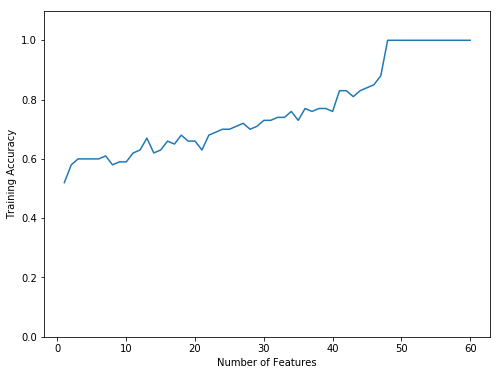

In [3]:
np.random.seed(10)
n = 100 # for example, change this to 10000
X = np.random.uniform(0,10,n).reshape(n,1)
y = np.random.choice([0,1],n)

mod = LogisticRegression(C=1e90)
mod.fit(X,y)
print(mod.score(X,y))

n_feat = [1]
acc = [mod.score(X,y)]

for i in range(2,61): # 59 colmuns
    new_col = np.random.normal(0,0.01,n).reshape(n,1) #really small std
    X = np.concatenate([X,new_col], axis=1) # add a little bit of noise
    mod = LogisticRegression(C=1e90)
    mod.fit(X,y)
    n_feat.append(i)
    acc.append(mod.score(X,y))
    
plt.close()
plt.rcParams["figure.figsize"] = [8,6]
plt.plot(n_feat, acc)
plt.ylim([0,1.1])
plt.xlabel('Number of Features')
plt.ylabel('Training Accuracy')
plt.show()         #so the more features, obviously over 50 features, overfitting

## Training-Test Split

A good way to test if your model is overfitting is to split the labeled data into a training set and a testing set. The model will be trained on the training set, but model performance will be assessed using the testing set. 

In [9]:
blah = np.array(['zero', 'one', 'two', 'three', 'four'])
print(blah[ 3 ])
print(blah[ [4, 0, 3, 1, 2] ]) # we need to shuffle features, cuz the first 3 might be all orange and the rest be apple when we 
#classify apple and orange


three
['four' 'zero' 'three' 'one' 'two']


In [11]:
index = np.random.choice(range(n), n, replace=False)
X_shuffled = X[index,:]
y_shuffled = y[index]

X_train = X_shuffled[:80,:] #take the first 80 observations if we didnt know the number of observation X_shuffled[:80*n,:] 
X_test = X_shuffled[80:,:]

y_train = y_shuffled[:80]
y_test = y_shuffled[80:]

In [16]:
mod = LogisticRegression(C=1e90) # try change from 1e90 to 1
mod.fit(X_train,y_train)

print('Training Accuracy:', mod.score(X_train,y_train))
print('Testing Accuracy:', mod.score(X_test,y_test)) # the result means its over fitting, cuz training accuracy 1 and 
#testing accuracy are different

Training Accuracy: 1.0
Testing Accuracy: 0.65


## Confusion Matrix

* TP (True Positives): The number of positive samples that were classified as positive. 
* FP (False Positives): The number of positive samples that were classified as negative.
* TN (True Negatives): The number of negative samples that were classified as negative.
* FN (False Negatives): The number of negative samples that were classified as positive.

TP means classified as positive and thats true

<table align="left">
    <tr>
        <td></td>
        <td>Pred Neg</td>
        <td>Pred Pos</td>
    </tr>
    <tr>
        <td>Actual Neg</td>
        <td style="border: 1px solid black; text-align:center">TN</td>
        <td style="border: 1px solid black; text-align:center">FP</td>
    </tr>
    <tr>
        <td>Actual Pos</td>
        <td style="border: 1px solid black; text-align:center">FN</td>
        <td style="border: 1px solid black; text-align:center">TP</td>
    </tr>
</table>
 


In [19]:
import sklearn.datasets as skds

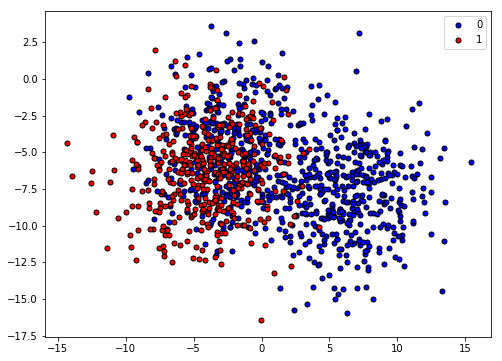

In [20]:
np.random.seed(416)
X, y = skds.X, y = skds.make_blobs(centers=3, n_features=2, n_samples=1200, cluster_std=3)
y = np.where(y == 2, 0, y)

plt.close()
plt.figure(figsize=(8, 6))
plt.scatter(X[y==0, 0], X[y==0, 1], marker='o', c='b', s=25, edgecolor='k', label=0)
plt.scatter(X[y==1, 0], X[y==1, 1], marker='o', c='r', s=25, edgecolor='k', label=1)
plt.legend()
plt.show()

In [21]:
mod = LogisticRegression(C=1e90)
mod.fit(X,y)
print(mod.score(X,y))

0.755


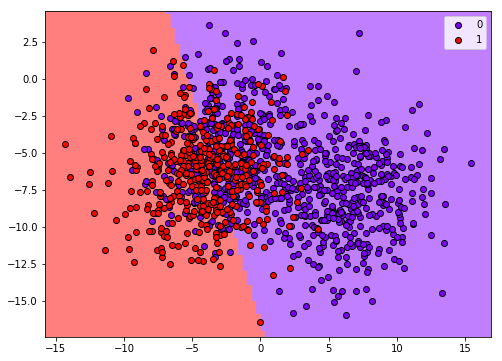

In [22]:
mlu.plot_regions(mod, X, y)

In [23]:
from sklearn.metrics import confusion_matrix

In [25]:
y_pred = mod.predict(X)
print(confusion_matrix(y, y_pred)) #the first row is for class 0 and the second row for class 1

[[677 123]
 [171 229]]


## Accuracy, Precision, and Recall

* Accuracy = $\Large\frac{TP + TN}{TP + TN + FP + FN}$


* Recall = $\Large\frac{TP}{TP + FN}$
  * The proportion of positive instances that are correctly classified.
  * This is the proportion of instances correctly detected by the model. 
  * Also called True Positive Rate (TPR), Sensitivity, Probability of Detection
  
  
* Precision = $\Large\frac{TP}{TP + FP}$
  * The proportion of instances classified as positive, that actual are positive. 
  * Precision is the probability that an instance belongs to the positive class if it is actually classified as positive. 
  * Also called Positive Predictive Value (PPV). 
  
Each class can be viewed as having its own precision and recall values. 

In [26]:
from sklearn.metrics import classification_report

In [27]:
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.80      0.85      0.82       800
          1       0.65      0.57      0.61       400

avg / total       0.75      0.76      0.75      1200

